In [35]:
#modelo usado em aula foi o do ps4, esse vou tentar fazer usando o xbox

In [36]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [37]:
base = pd.read_csv('/content/XboxOne_GameSales.csv', encoding='latin-1')

In [38]:
base.head()

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43


In [39]:
base.shape

(613, 10)

In [40]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pos            613 non-null    int64  
 1   Game           613 non-null    object 
 2   Year           505 non-null    float64
 3   Genre          613 non-null    object 
 4   Publisher      505 non-null    object 
 5   North America  613 non-null    float64
 6   Europe         613 non-null    float64
 7   Japan          613 non-null    float64
 8   Rest of World  613 non-null    float64
 9   Global         613 non-null    float64
dtypes: float64(6), int64(1), object(3)
memory usage: 48.0+ KB


In [41]:
base.isnull().sum()

Pos                0
Game               0
Year             108
Genre              0
Publisher        108
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

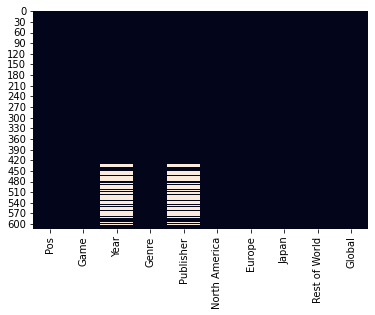

In [42]:
sns.heatmap( base.isnull(), cbar=False)

In [43]:
base = base.dropna()

In [44]:
base
#base de dados completa

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43
...,...,...,...,...,...,...,...,...,...,...
608,609,Biomutant,2018.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
609,610,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
610,611,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
611,612,Outcast: Second Contact,2017.0,Adventure,Bigben Interactive,0.00,0.00,0.00,0.00,0.00


<BarContainer object of 505 artists>

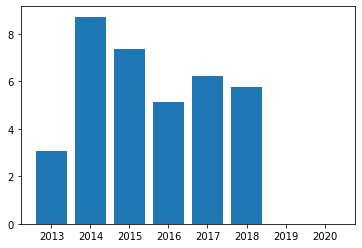

In [45]:
plt.bar(data=base, x='Year', height='Global')
#gráfico de barra errado.

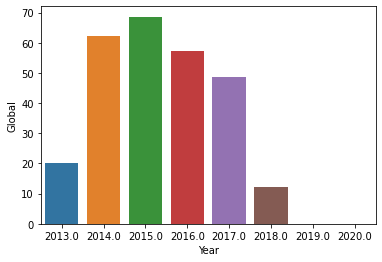

In [46]:
sns.barplot(data=base, x='Year', y='Global', estimator=sum, ci=None) #ci none tira a barrinha preta
#gráfico de barra mosntrando a evoluçao das vendas gloabais por ano, tendo como parametro a soma.

In [47]:
base = base[(base['Year'] != 2019) & (base['Year'] != 2020)]
#subescrevendo a base de dados com afastamento de 2019 e 2020

In [48]:
paleta_cores= sns.color_palette('gist_rainbow', 10)
paleta_cores
#fazendo uma paleta de cores, para isso, basta escrever qualquer coisa dentro das aspas para ter as opçoes

[(1.0, 0.325384207737149, 0.0),
 (1.0, 0.81293057763646, 0.0),
 (0.6995230524642289, 1.0, 0.0),
 (0.19077901430842603, 1.0, 0.0),
 (0.0, 1.0, 0.29517183217372983),
 (0.0, 1.0, 0.7800969850305717),
 (0.0, 0.7320971867007668, 1.0),
 (0.0, 0.22058823529411742, 1.0),
 (0.2696078431372551, 0.0, 1.0),
 (0.7598039215686277, 0.0, 1.0)]

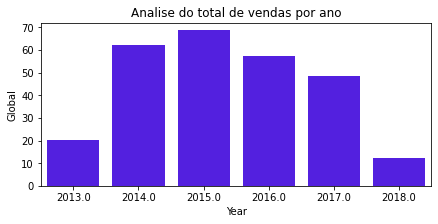

In [49]:
plt.figure(figsize=(7,3))
plt.title('Analise do total de vendas por ano')
sns.barplot(data=base, x='Year', y='Global', estimator=sum, ci=None, color=paleta_cores[8]);

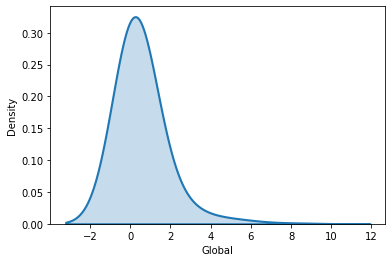

In [50]:
sns.kdeplot(data=base['Global'], shade=True, bw=1, linewidth=2.1);

In [51]:
baseresumo = base.groupby(["Year"]).sum().reset_index()
baseresumo
#criando uma variavel, onde a mesma recebe um agrupamento com a soma de tudo por ano

,Year,Pos,North America,Europe,Japan,Rest of World,Global
0,2013.0,2802,12.14,6.03,0.02,1.81,20.03
1,2014.0,17304,35.92,20.56,0.17,5.51,62.12
2,2015.0,28945,42.16,19.97,0.23,6.29,68.61
3,2016.0,31994,34.19,17.90,0.08,5.27,57.37
4,2017.0,38401,30.06,13.86,0.01,4.46,48.51
5,2018.0,6375,8.21,2.84,0.00,1.15,12.20


In [52]:
baseresumo.drop('Pos', 1, inplace=True)
#afastando a coluna posição e, e inserido automatiamente na baseresumo por meio do inplace

In [53]:
baseresumo

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,12.14,6.03,0.02,1.81,20.03
1,2014.0,35.92,20.56,0.17,5.51,62.12
2,2015.0,42.16,19.97,0.23,6.29,68.61
3,2016.0,34.19,17.90,0.08,5.27,57.37
4,2017.0,30.06,13.86,0.01,4.46,48.51
5,2018.0,8.21,2.84,0.00,1.15,12.20


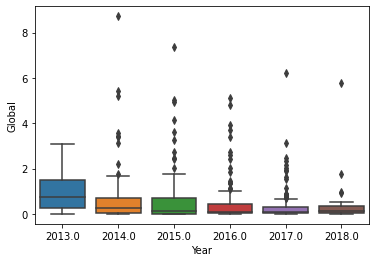

In [54]:
sns.boxplot(data=base, x='Year', y='Global');
#vendas por ano, onde pelo boxplot nota-se os quartis e os outliers

In [55]:
base[ 'Game'].nunique()
#verificando a quantidade de jogos existentes na lista

492

In [56]:
listavenda = base.groupby(['Game']).sum()['Global'].reset_index()
#agrupando na variavel listavenda, os totais vendidos por jogo

In [57]:
listavenda.sort_values('Global', ascending=False).head(10)
#lista, do maior para o menor, dos jogos mais vendidos

,Game,Global
166,Grand Theft Auto V,8.72
60,Call of Duty: Black Ops 3,7.37
64,Call of Duty: WWII,6.23
328,Red Dead Redemption 2,5.77
245,MineCraft,5.43
59,Call of Duty: Advanced Warfare,5.22
41,Battlefield 1,5.13
137,Fallout 4,5.03
168,Halo 5: Guardians,4.92
62,Call of Duty: Infinite Warfare,4.79


In [58]:
#filtrando jogos com mais de 5 milhoes de vendas, utilizando o loc
base.loc[base['Global'] >= 5]

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43
5,6,Call of Duty: Advanced Warfare,2014.0,Shooter,Activision,3.25,1.49,0.01,0.48,5.22
6,7,Battlefield 1,2016.0,Shooter,Electronic Arts,3.37,1.26,0.02,0.48,5.13
7,8,Fallout 4,2015.0,Role-Playing,Bethesda Softworks,2.94,1.62,0.02,0.45,5.03


In [59]:
base.head()

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43


In [60]:
#excluindo a coluna Pos do conjunto de dado original
base.drop('Pos', axis=1,inplace=True)

In [61]:
#essa linha abaixo, foi feito porque nao foi possivel incluir a base orignal no cálculo de tamanhho de regiao sobre as vendas globais
#assim, foi usado o groupby pelo ano, incluindo apenas as series que possuem numeros e não texto
#o sum, soma as vendas por ano e por regiao
#tudo isso, posteriormente lançado em uma variável
testefiltro = base.groupby('Year').sum().reset_index()
testefiltro

,Year,North America,Europe,Japan,Rest of World,Global
0,2013.0,12.14,6.03,0.02,1.81,20.03
1,2014.0,35.92,20.56,0.17,5.51,62.12
2,2015.0,42.16,19.97,0.23,6.29,68.61
3,2016.0,34.19,17.90,0.08,5.27,57.37
4,2017.0,30.06,13.86,0.01,4.46,48.51
5,2018.0,8.21,2.84,0.00,1.15,12.20


In [62]:
#TESTEI FAZER OS CÁLCULOS ABAIXO USANDO O DATAFRAME DE BASE
#O ERRO APONTADO ERA DE DIVISÃO POR ZERO, ASSIM, FOI USADO O GROUPBY

In [63]:
america = [america/total * 100 for america, total in zip(base['North America'], base['Global'])]
america

ZeroDivisionError: ignored

In [ ]:
#Nesse ponto, foi usado um conceito novo, o de for e zip

In [64]:
america = [america/total * 100 for america, total in zip(testefiltro['North America'], testefiltro['Global'])]
america

[60.609086370444345,
 57.82356728911784,
 61.4487684011077,
 59.59560746034512,
 61.96660482374769,
 67.29508196721311]

In [65]:
europa = [europa/total * 100 for europa, total in zip(testefiltro['Europe'], testefiltro['Global'])]
europa

[30.10484273589616,
 33.09723116548616,
 29.106544235534177,
 31.2009761199233,
 28.57142857142857,
 23.278688524590162]

In [66]:
japao = [japao/total * 100 for japao, total in zip(testefiltro['Japan'], testefiltro['Global'])]
japao

[0.0998502246630055,
 0.27366387636831935,
 0.33522810085993293,
 0.13944570332926617,
 0.020614306328592045,
 0.0]

In [67]:
resto = [resto/total * 100 for resto,total in zip(testefiltro['Rest of World'], testefiltro['Global'])]
resto

[9.036445332001998,
 8.869929169349646,
 9.167759801778166,
 9.18598570681541,
 9.193980622552052,
 9.426229508196723]

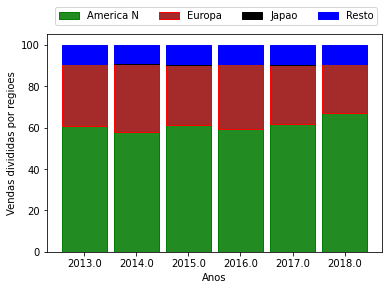

In [136]:
#tentando fazendo um gráfico de barra empilhado.

#
Largura_barra=0.85
Rotulos = testefiltro['Year']
Grupos = [0, 1, 2, 3, 4, 5]

#para empilhar, usa-se bottom, igual abaixo
plt.bar(Grupos, america, width=Largura_barra, color='forestgreen', edgecolor='green')

plt.bar(Grupos, europa, bottom=america, width=Largura_barra, color='brown', edgecolor='red')

plt.bar(Grupos, japao, bottom=[A + B for A, B in zip(america, europa)], width=Largura_barra, color='black', edgecolor='black')

plt.bar(Grupos, resto, bottom=[A + B + C for A, B, C in zip(america, europa, japao)], width=Largura_barra, color='blue', edgecolor='blue')

#aqui no xticks, afeita o eixo X, onde correlacionou os grupos com os rotulos
plt.xticks(Grupos, Rotulos)
plt.xlabel("Anos")
plt.ylabel('Vendas divididas por regioes')

plt.legend(['America N', 'Europa', 'Japao', 'Resto'], loc='upper left', bbox_to_anchor=(0.01, 1.15), ncol=4)
#na legenda, entre colchete/lista, insira os nomes dos itens
#o bbox_to_anchor vai realogar a caixa de legeda
#enquanto o ncol indica a forma que a legenda sera apresentada, se um embaixo da outra (1), duas embaixo de duas (2) ou uma do lado da outra (4)
#ou seja, o numeor digitado entre parenteses refere-se a ordem de apariçao da legenda

In [122]:
base['Publisher'].nunique()

96

In [137]:
#para transformar texto em um número é preciso importar essa primeira linha
from sklearn.preprocessing import LabelEncoder
Funcao_label = LabelEncoder()

base['Produtora'] = Funcao_label.fit_transform(base['Publisher'])
base['Genero'] = Funcao_label.fit_transform(base['Genre'])
base['Jogo'] = Funcao_label.fit_transform(base['Game'])

In [138]:
base.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Produtora,Genero,Jogo
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72,67,0,166
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37,5,11,60
2,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23,5,11,64
3,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77,67,1,328
4,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43,48,5,245


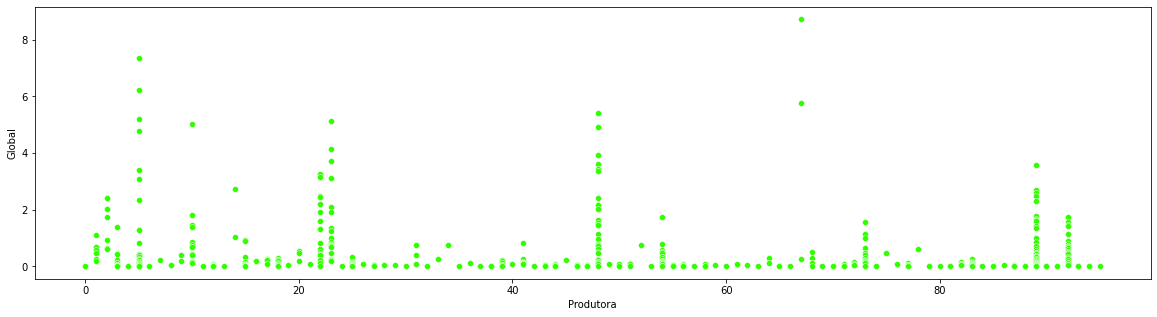

In [143]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=base, x='Produtora', y='Global', color=paleta_cores[3])

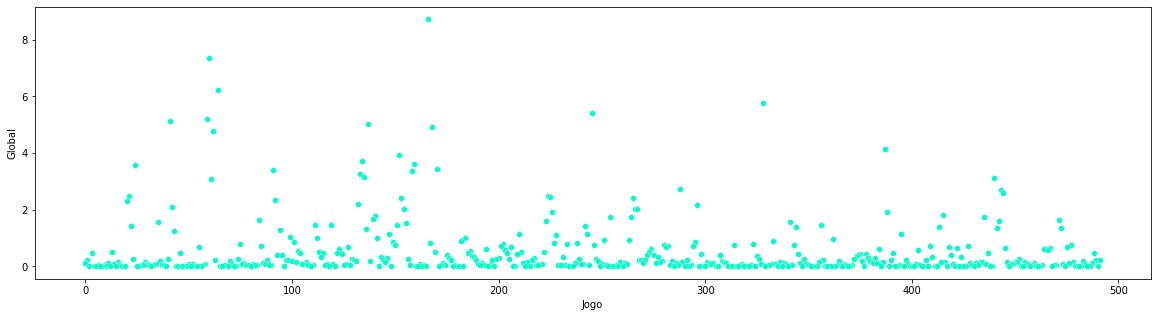

In [145]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=base, x='Jogo', y='Global', color=paleta_cores[5])

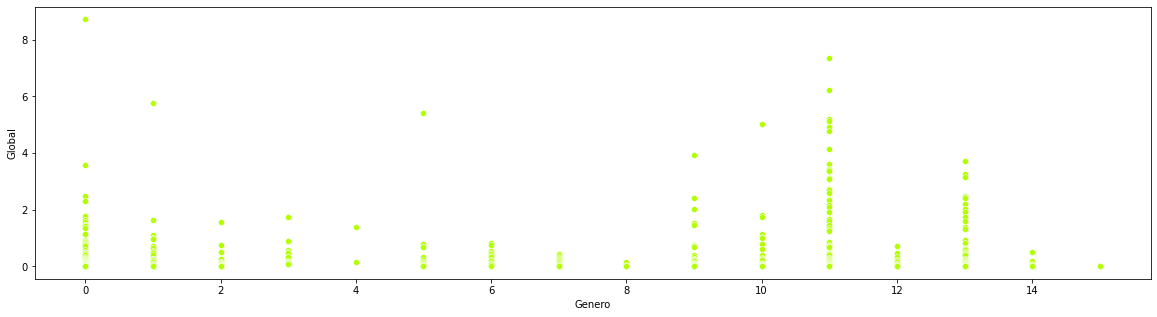

In [146]:
plt.figure(figsize=(20,5))
sns.scatterplot(data=base, x='Genero', y='Global', color=paleta_cores[2])

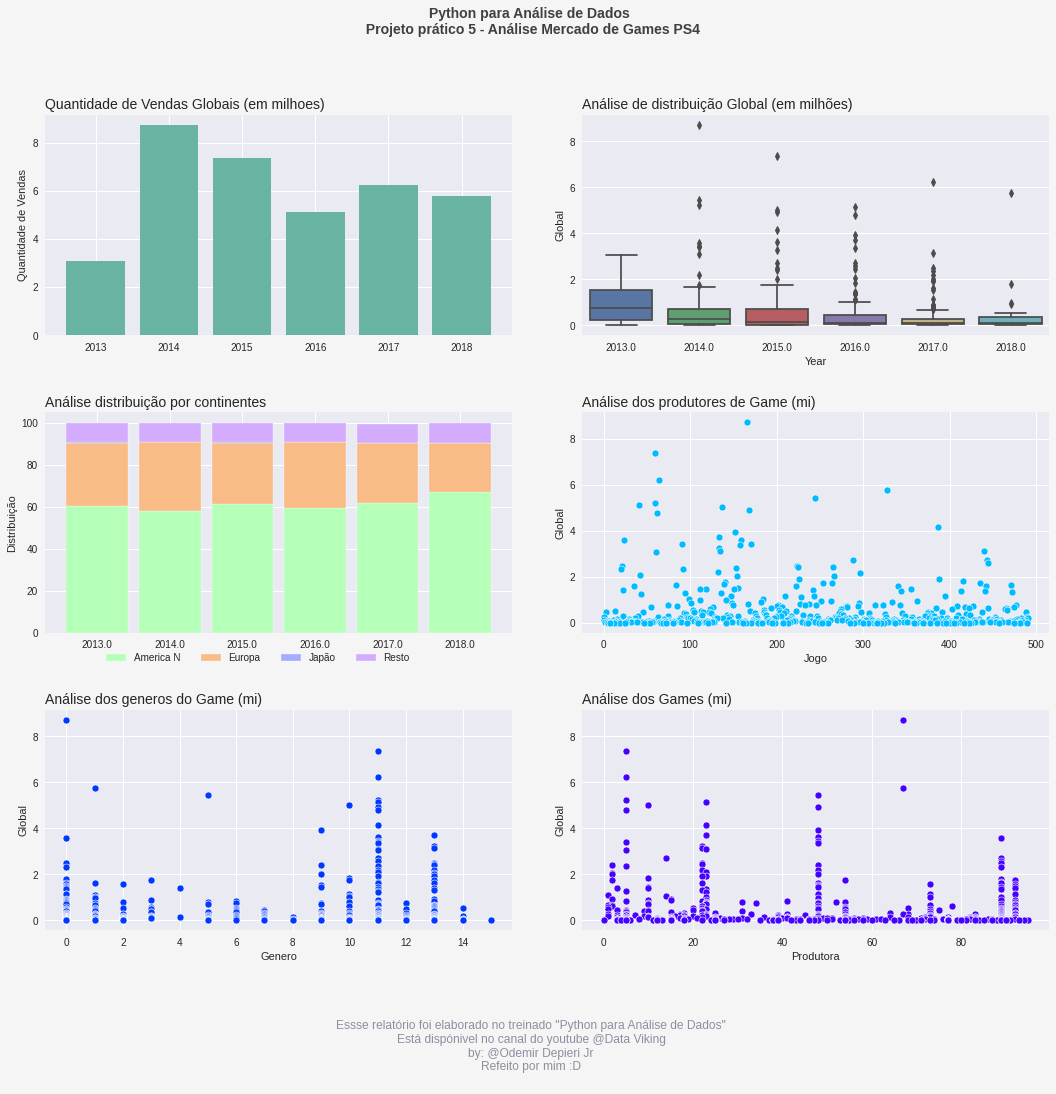

In [206]:
#reproduzindo o conjunto de gráficos apresentados no notebook oficial

fig, ax = plt.subplots(figsize=(18,15)) #essa primeira linha, especifica o tamanho geral da img, onde estarão inclusos todos os subplots dentro dessa

#todo vez que for fazer referencia a formataçao dos subplots, usa-se o ax
#toda vez, que for fazer referencia a figura, usa-se fig

#cor de fundo

Cor_fundo = '#f5f5f5'
ax.set_facecolor(Cor_fundo) #aqui mudou a cor de onde ficaram os subplots
fig.set_facecolor(Cor_fundo) #aqui mudou a cor da borda da igm

#estilo
#plt.style.use('seaborn')

#titulo da figura
plt.suptitle('Python para Análise de Dados \n Projeto prático 5 - Análise Mercado de Games PS4', fontsize=14, color='#404040', fontweight=600)


#Parametros par aum grid
Linhas = 3
Colunas = 2


#fazendo grafico 1
#plt.figure(figsize=()), aqui, ja tem um erro, pois será feito a baciada entao nao dá para usar o plt.figure
# a soluçao é o subplot

plt.subplot(Linhas, Colunas, 1) # esse escuto, indica ao colab onde que se encontrará o primeiro gráfico
plt.title('Quantidade de Vendas Globais (em milhoes)', fontsize=14, loc='left')
plt.bar(data=base, x='Year', height='Global', color='#69b3a2')
plt.ylabel('Quantidade de Vendas')

#segundo gráfico
plt.subplot(Linhas, Colunas, 2)
plt.title('Análise de distribuição Global (em milhões)',fontsize=14, loc='left' )
sns.boxplot(data=base, y='Global', x='Year')

#terceiro gráfico
plt.subplot(Linhas, Colunas, 3)
#largura da barra
tam_barr= 0.85
Grupo = [0, 1, 2, 3, 4, 5]
Rotulo = testefiltro['Year']

#graficos
plt.title('Análise distribuição por continentes', fontsize=14, loc='left')
plt.bar(Grupo, america, width=tam_barr, color='#b5ffb9', edgecolor='white')

plt.bar(Grupo, europa, bottom=america, width=tam_barr, color='#f9bc86', edgecolor='white')

plt.bar(Grupo, japao, bottom=[A + B for A, B in zip(america, europa)], width=tam_barr, color='#a3acff', edgecolor='white')

plt.bar(Grupo, resto, bottom=[ A + B + C for A, B, C in zip(america, europa, japao)], width=tam_barr, color='#d3acfe', edgecolor='white')

#labels
plt.xticks(Grupo, Rotulo)
plt.ylabel('Distribuição')

plt.legend(['America N', 'Europa', 'Japão', 'Resto'], bbox_to_anchor=(0.8, -0.05), ncol=4)

#grafico 4
plt.subplot(Linhas, Colunas, 4)
plt.title('Análise dos produtores de Game (mi)', fontsize=14, loc='left')
sns.scatterplot(data=base, x='Jogo', y='Global', color=paleta_cores[6])

#gráfico 5
plt.subplot(Linhas, Colunas, 5)
plt.title('Análise dos generos do Game (mi)', fontsize=14, loc='left')
sns.scatterplot(data=base, x='Genero', y='Global', color=paleta_cores[7])

#gráfico 6
plt.subplot(Linhas, Colunas, 6)
plt.title('Análise dos Games (mi)', fontsize=14, loc='left')
sns.scatterplot(data=base, x='Produtora', y='Global', color=paleta_cores[8])

#ajustar layout
plt.subplots_adjust(hspace=0.35, wspace=0.15)

#rodapé
Rodape='''
Essse relatório foi elaborado no treinado "Python para Análise de Dados"
Está dispónivel no canal do youtube @Data Viking
by: @Odemir Depieri Jr
Refeito por mim :D
'''

#incluindo o rodape no relatório
fig.text( 0.5, -0.02, Rodape, ha='center', va='bottom', size=12, color='#938ca1');
